#### **Feature Transformation - To use PCA Algorithm for dimensionality reduction.**

You have a dataset that includes measurements for different variables on wine
(alcohol, ash, magnesium, and so on). Apply PCA algorithm & transform this data
so that most variations in the measurements of the variables are captured by a small
number of principal components so that it is easier to distinguish between red and
white wine by inspecting these principal components.

Dataset Link: https://media.geeksforgeeks.org/wp-content/uploads/Wine.csv

### **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

### **Loading the Dataset**

#### _URL Of the Dataset (Wine Dataset)_ : https://media.geeksforgeeks.org/wp-content/uploads/Wine.csv

In [2]:
df = pd.read_csv('Wine.csv')

In [3]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


### **Understanding The Dataset**

In [4]:
# Checking dimensions of the data frame
df.shape

(178, 14)

In [5]:
# Variable descriptions
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
#Checking Datatypes of each column
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
Customer_Segment          int64
dtype: object

In [7]:
# Get initial statistics
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [8]:
#Checking For null values
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

### **Data Preprocessing**

In [9]:
# Separating features and target variable
X = df.drop(columns=['Customer_Segment'])  # Dropping the Target Component for training
y = df['Customer_Segment']  # As it is the Target variable (Type of wine)

In [10]:
X

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [11]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Customer_Segment, Length: 178, dtype: int64

In [12]:
#Scaling the data using Standard Scalar

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### **PCA Algorithm Implementation**

In [13]:
#Appling PCA with 2 components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [14]:
# Creating a new DataFrame with the first two principal components
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Customer_Segment'] = y

In [15]:
pca_df

,Principal Component 1,Principal Component 2,Customer_Segment
0,3.316751,-1.443463,1
1,2.209465,0.333393,1
2,2.516740,-1.031151,1
3,3.757066,-2.756372,1
4,1.008908,-0.869831,1
...,...,...,...
173,-3.370524,-2.216289,3
174,-2.601956,-1.757229,3
175,-2.677839,-2.760899,3
176,-2.387017,-2.297347,3


### **Visualization and Comparison**

#### _Before applying PCA (Original Data)_

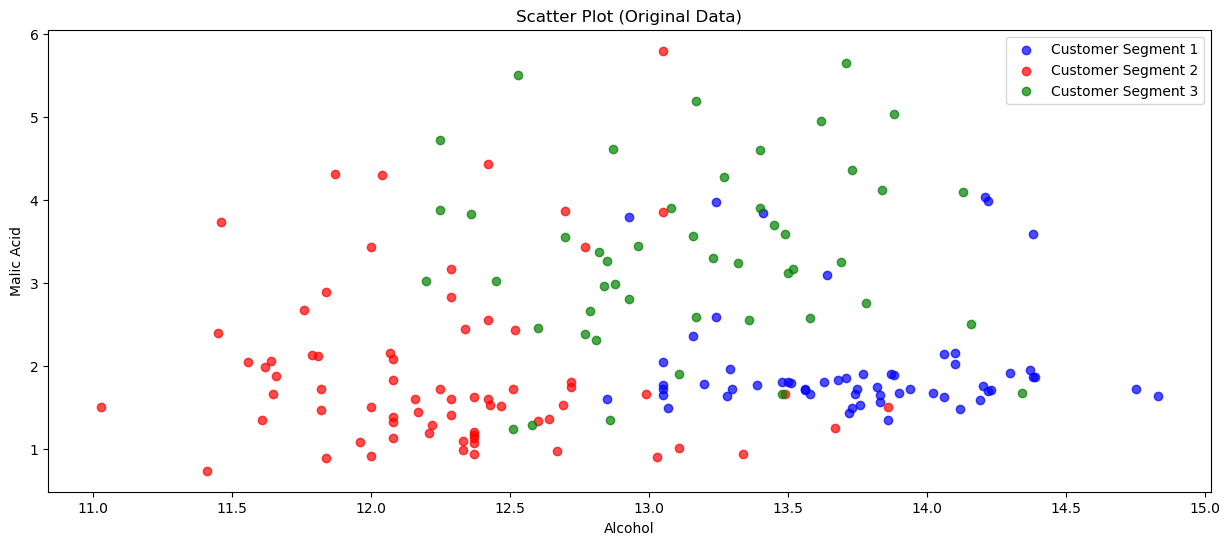

In [16]:
plt.figure(figsize=(15, 6))
colors = {1: 'blue', 2: 'red', 3: 'green'}

# Scatter plot for Customer Segment 1
plt.scatter(
    X[y == 1]['Alcohol'],
    X[y == 1]['Malic_Acid'],
    color = colors[1], 
    label = 'Customer Segment 1',
    alpha = 0.7
)

# Scatter plot for Customer Segment 2
plt.scatter(
    X[y == 2]['Alcohol'],
    X[y == 2]['Malic_Acid'],
    color = colors[2], 
    label = 'Customer Segment 2',
    alpha = 0.7
)

# Scatter plot for Customer Segment 3
plt.scatter(
    X[y == 3]['Alcohol'],
    X[y == 3]['Malic_Acid'],
    color = colors[3],  
    label = 'Customer Segment 3',
    alpha = 0.7
)

# Set labels and title
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend()
plt.title('Scatter Plot (Original Data)')
plt.show()


#### _After applying PCA (Transformed Data)_

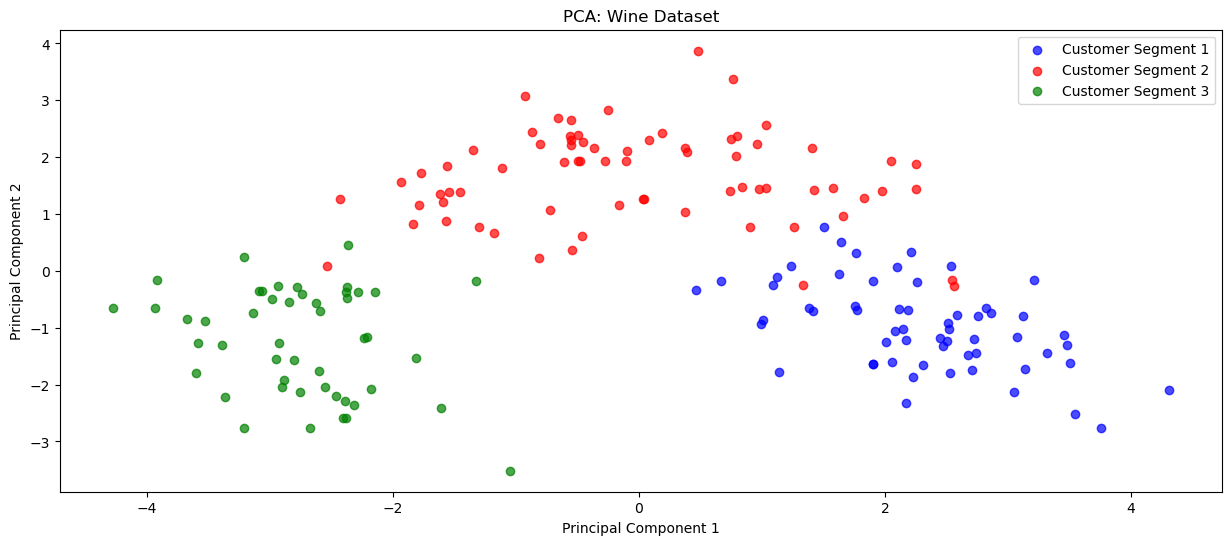

In [17]:
plt.figure(figsize=(15, 6))
colors = {1: 'blue', 2: 'red', 3: 'green'}

# Scatter plot for Customer Segment 1
plt.scatter(
    pca_df[pca_df['Customer_Segment'] == 1]['Principal Component 1'],
    pca_df[pca_df['Customer_Segment'] == 1]['Principal Component 2'],
    color = colors[1],  # Set color for segment 1
    label = 'Customer Segment 1',
    alpha = 0.7
)

# Scatter plot for Customer Segment 2
plt.scatter(
    pca_df[pca_df['Customer_Segment'] == 2]['Principal Component 1'],
    pca_df[pca_df['Customer_Segment'] == 2]['Principal Component 2'],
    color = colors[2],  # Set color for segment 2
    label = 'Customer Segment 2',
    alpha = 0.7
)

# Scatter plot for Customer Segment 3
plt.scatter(
    pca_df[pca_df['Customer_Segment'] == 3]['Principal Component 1'],
    pca_df[pca_df['Customer_Segment'] == 3]['Principal Component 2'],
    color = colors[3],  # Set color for segment 3
    label = 'Customer Segment 3',
    alpha = 0.7
)


plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA: Wine Dataset')
plt.show()


### **PCA with 3 Principal Components**

In [18]:
pca_new = PCA(n_components=3)
X_pca_new = pca_new.fit_transform(X_scaled)

In [19]:
# Creating a new DataFrame with the principal components
pca_df_new = pd.DataFrame(data = X_pca_new, columns = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
pca_df_new['Customer_Segment'] = y

In [20]:
pca_df_new

,Principal Component 1,Principal Component 2,Principal Component 3,Customer_Segment
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3
174,-2.601956,-1.757229,0.207581,3
175,-2.677839,-2.760899,-0.940942,3
176,-2.387017,-2.297347,-0.550696,3


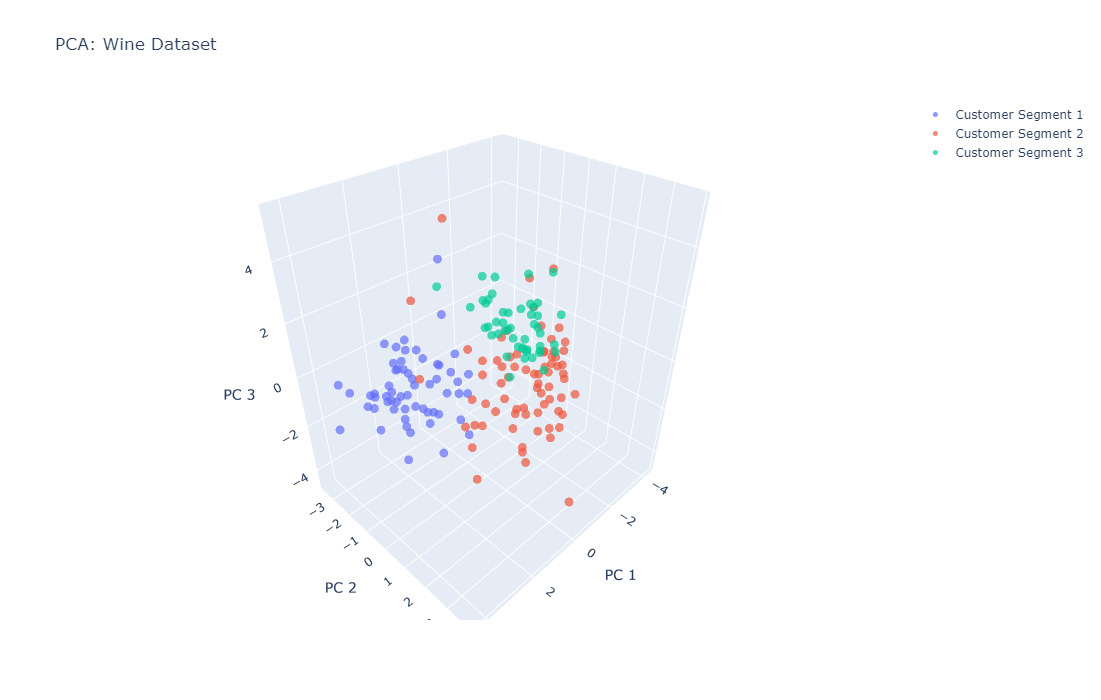

In [23]:
# Creating a 3D scatter plot using Plotly
fig = go.Figure()

# Add scatter plots for each customer segment
for segment in pca_df_new['Customer_Segment'].unique():
    segment_data = pca_df_new[pca_df_new['Customer_Segment'] == segment]
    fig.add_trace(go.Scatter3d(
        x=segment_data['Principal Component 1'],
        y=segment_data['Principal Component 2'],
        z=segment_data['Principal Component 3'],
        mode='markers',
        marker=dict(size=5, opacity=0.7),
        name=f'Customer Segment {segment}'
    ))

# Update layout
fig.update_layout(
    scene=dict(
        xaxis_title='PC 1',
        yaxis_title='PC 2',
        zaxis_title='PC 3'
    ),
    title='PCA: Wine Dataset',
    width=1000,  
    height=700 
)

# Show the plot
fig.show()